# Thesis Evaluation Results

In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

Read the CSV file and split into two - Rosetta, and Vitis Accel Examples.

In [167]:
eval_df = pd.read_csv('thesis-evaluation-data-latest.csv')

vitis_eval_df = eval_df[eval_df["Benchmark"] == "Vitis Accel Examples"]

rosetta_eval_df = eval_df[eval_df["Benchmark"] == "Rosetta"]

# Research Question 1: TODO ADD HERE

## 1. Vitis Accel Examples

In [168]:
execution_times_per_target = {}
for target in vitis_eval_df["Target Device"].unique():
    execution_times_per_target[target] = vitis_eval_df[vitis_eval_df["Target Device"] == target]["Kernel Execution Time (in ms)"]

Text(0.5, 0, 'Applications in Vitis Accel Examples')

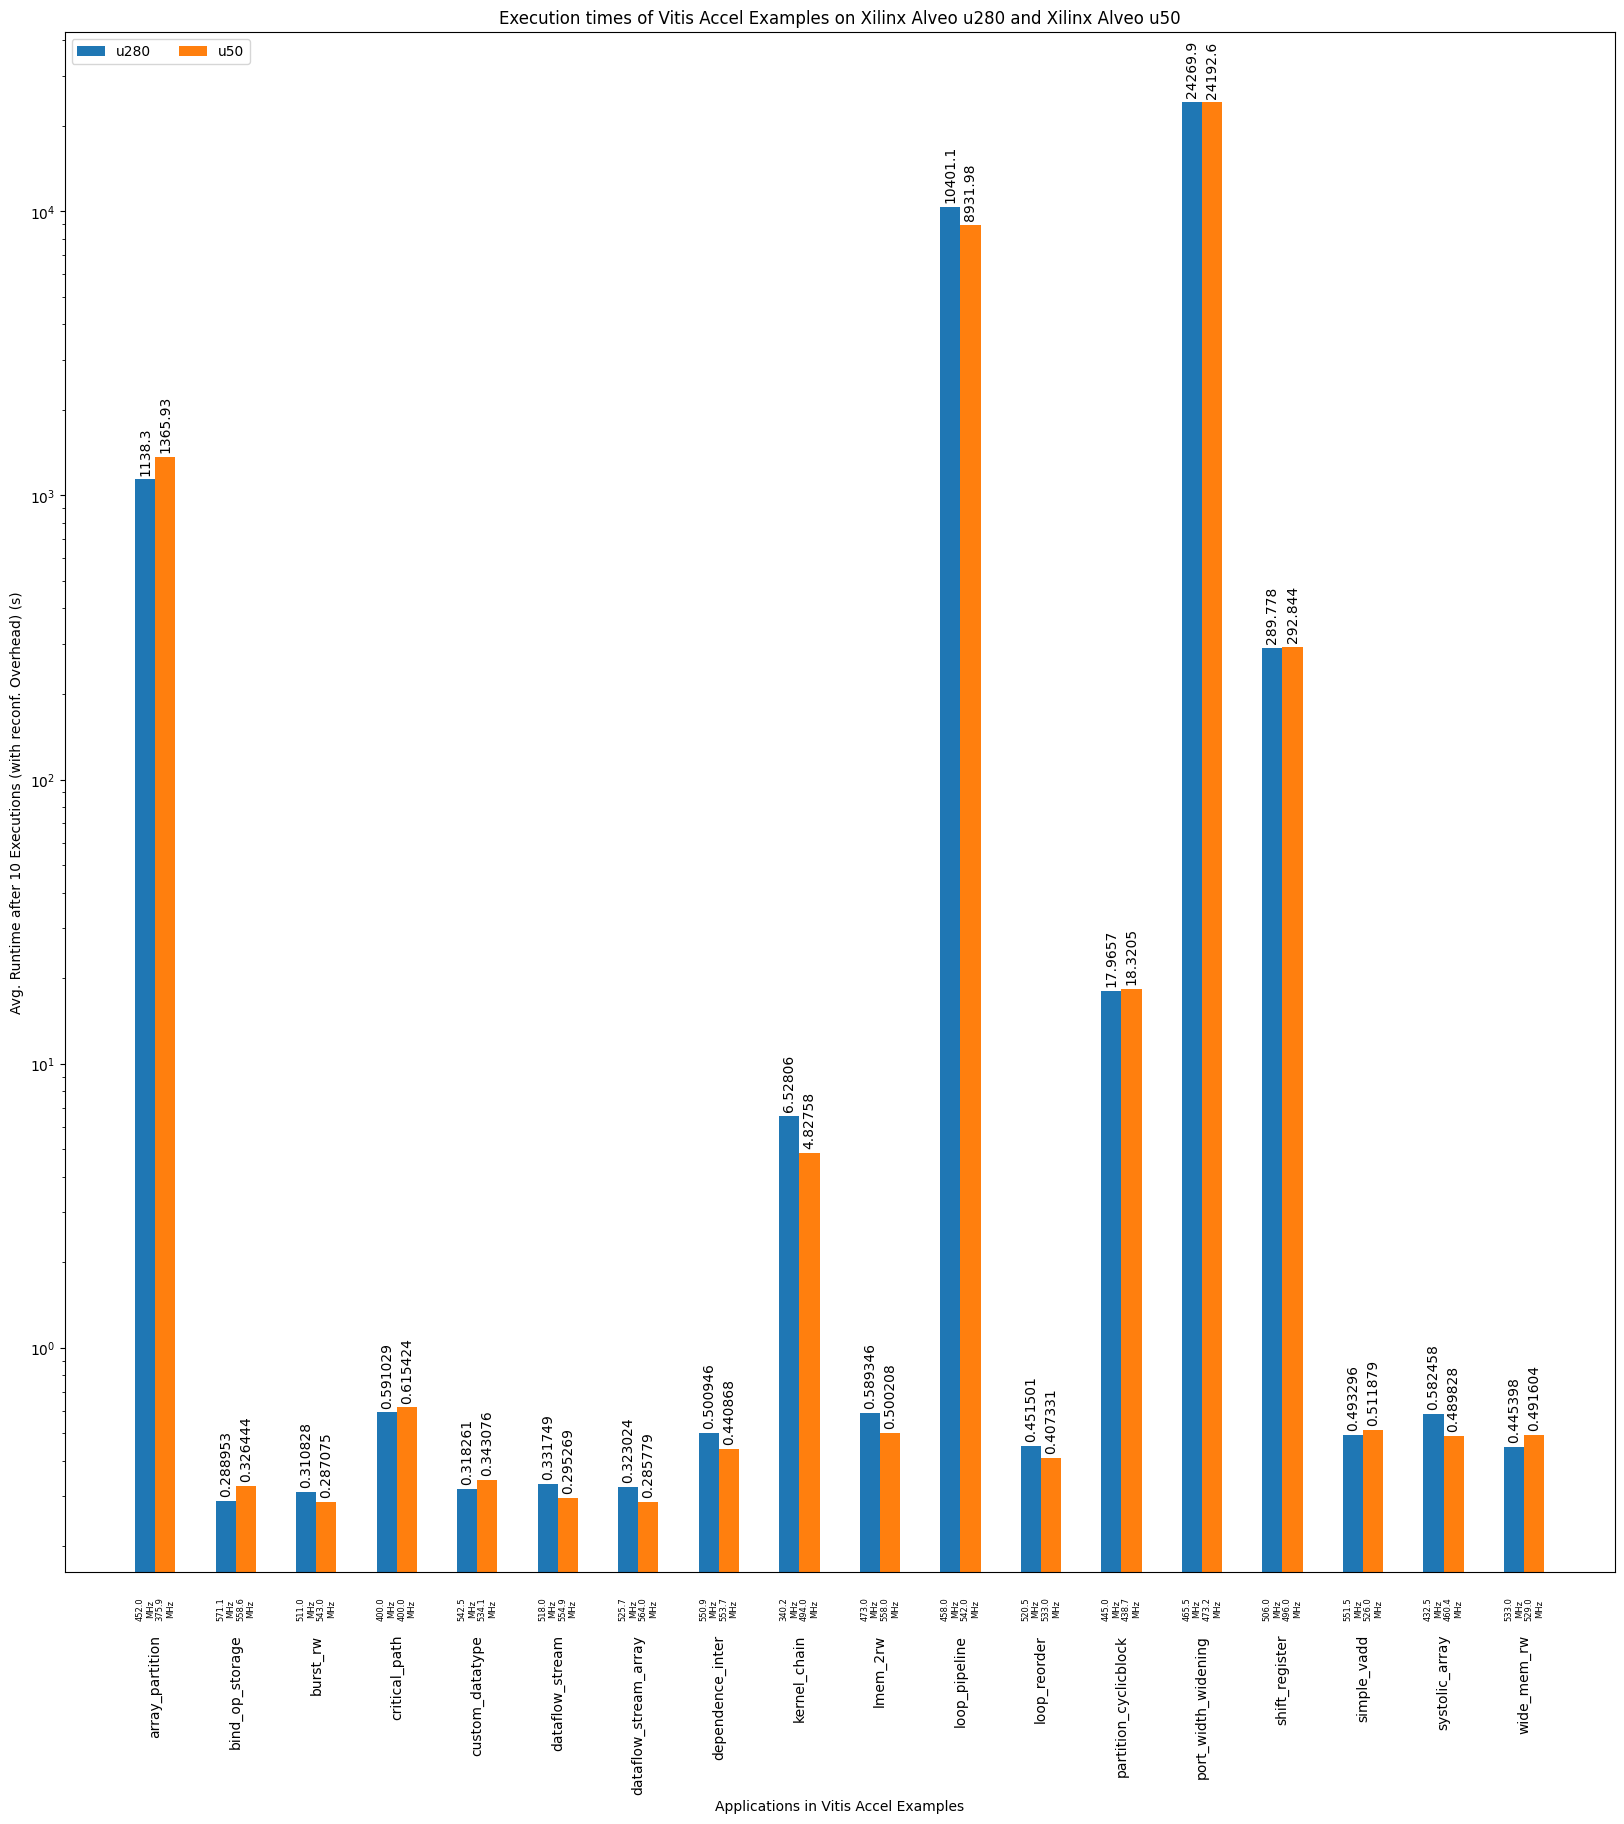

In [169]:
# To make the plot look good.

apps = vitis_eval_df["Application"].unique()
x = np.arange(len(apps))
width = 0.25
multiplier = 0

freq_ticks = []
for target in vitis_eval_df["Target Device"].unique():
    freq_ticks.extend([str(a) + "\nMHz" for a in vitis_eval_df[(vitis_eval_df["Target Device"] == target)]["Actual Clock Frequency"].values])

fig, ax = plt.subplots(figsize=(20,20)) # (layout="constrained")

freq_ticks_offset = []
for target, execution_times in execution_times_per_target.items():
    offset = width * multiplier
    rects = ax.bar(
        x + offset,
        execution_times,
        width,
        label=target,
        # yerr=vitis_eval_df[vitis_eval_df["Target Device"] == target]["Std. Dev. of Runtime after 10 Executions (with reconf. Overhead)"],
        # ecolor="black",
        # capsize=3,
    )
    ax.bar_label(rects, padding=3, rotation=90, fontsize=10)
    freq_ticks_offset.extend([a for a in x + offset])
    multiplier += 1

ax.set_yscale("log")

ax.legend(loc="upper left", ncols=2)
ax.set_ylabel("Avg. Runtime after 10 Executions (with reconf. Overhead) (s)")
ax.set_title("Execution times of Vitis Accel Examples on Xilinx Alveo u280 and Xilinx Alveo u50")
ax.set_xticks(x + width / 2, apps, rotation=90)
ax.tick_params(axis='x', which='major', length=0, pad=45)
ax.set_xticks(freq_ticks_offset, freq_ticks, minor=True)
ax.tick_params(axis='x', which='minor', length=0, pad=18, labelsize=6, rotation=90)
ax.set_xlabel("Applications in Vitis Accel Examples")

In [170]:
vitis_eval_df_u50 = vitis_eval_df[vitis_eval_df["Target Device"] == "u50"]

vitis_eval_df_u280 = vitis_eval_df[vitis_eval_df["Target Device"] == "u280"]

vitis_eval_df_u50["Actual Clock Frequency"].values > vitis_eval_df_u280["Actual Clock Frequency"].values

array([False, False,  True, False, False,  True,  True,  True,  True,
        True,  True,  True, False,  True, False, False,  True, False])

## 2. Rosetta

In [171]:
execution_times_per_target = {}
for target in rosetta_eval_df["Target Device"].unique():
    execution_times_per_target[target] = rosetta_eval_df[rosetta_eval_df["Target Device"] == target]["Kernel Execution Time (in ms)"]

[0 1 2 3 4 5 6 7]
['291.9\nMHz', '284.0\nMHz', '388.0\nMHz', '408.0\nMHz', '276.0\nMHz', '355.0\nMHz', '499.7\nMHz', '430.0\nMHz']


Text(0.5, 0, 'Applications in Rosetta')

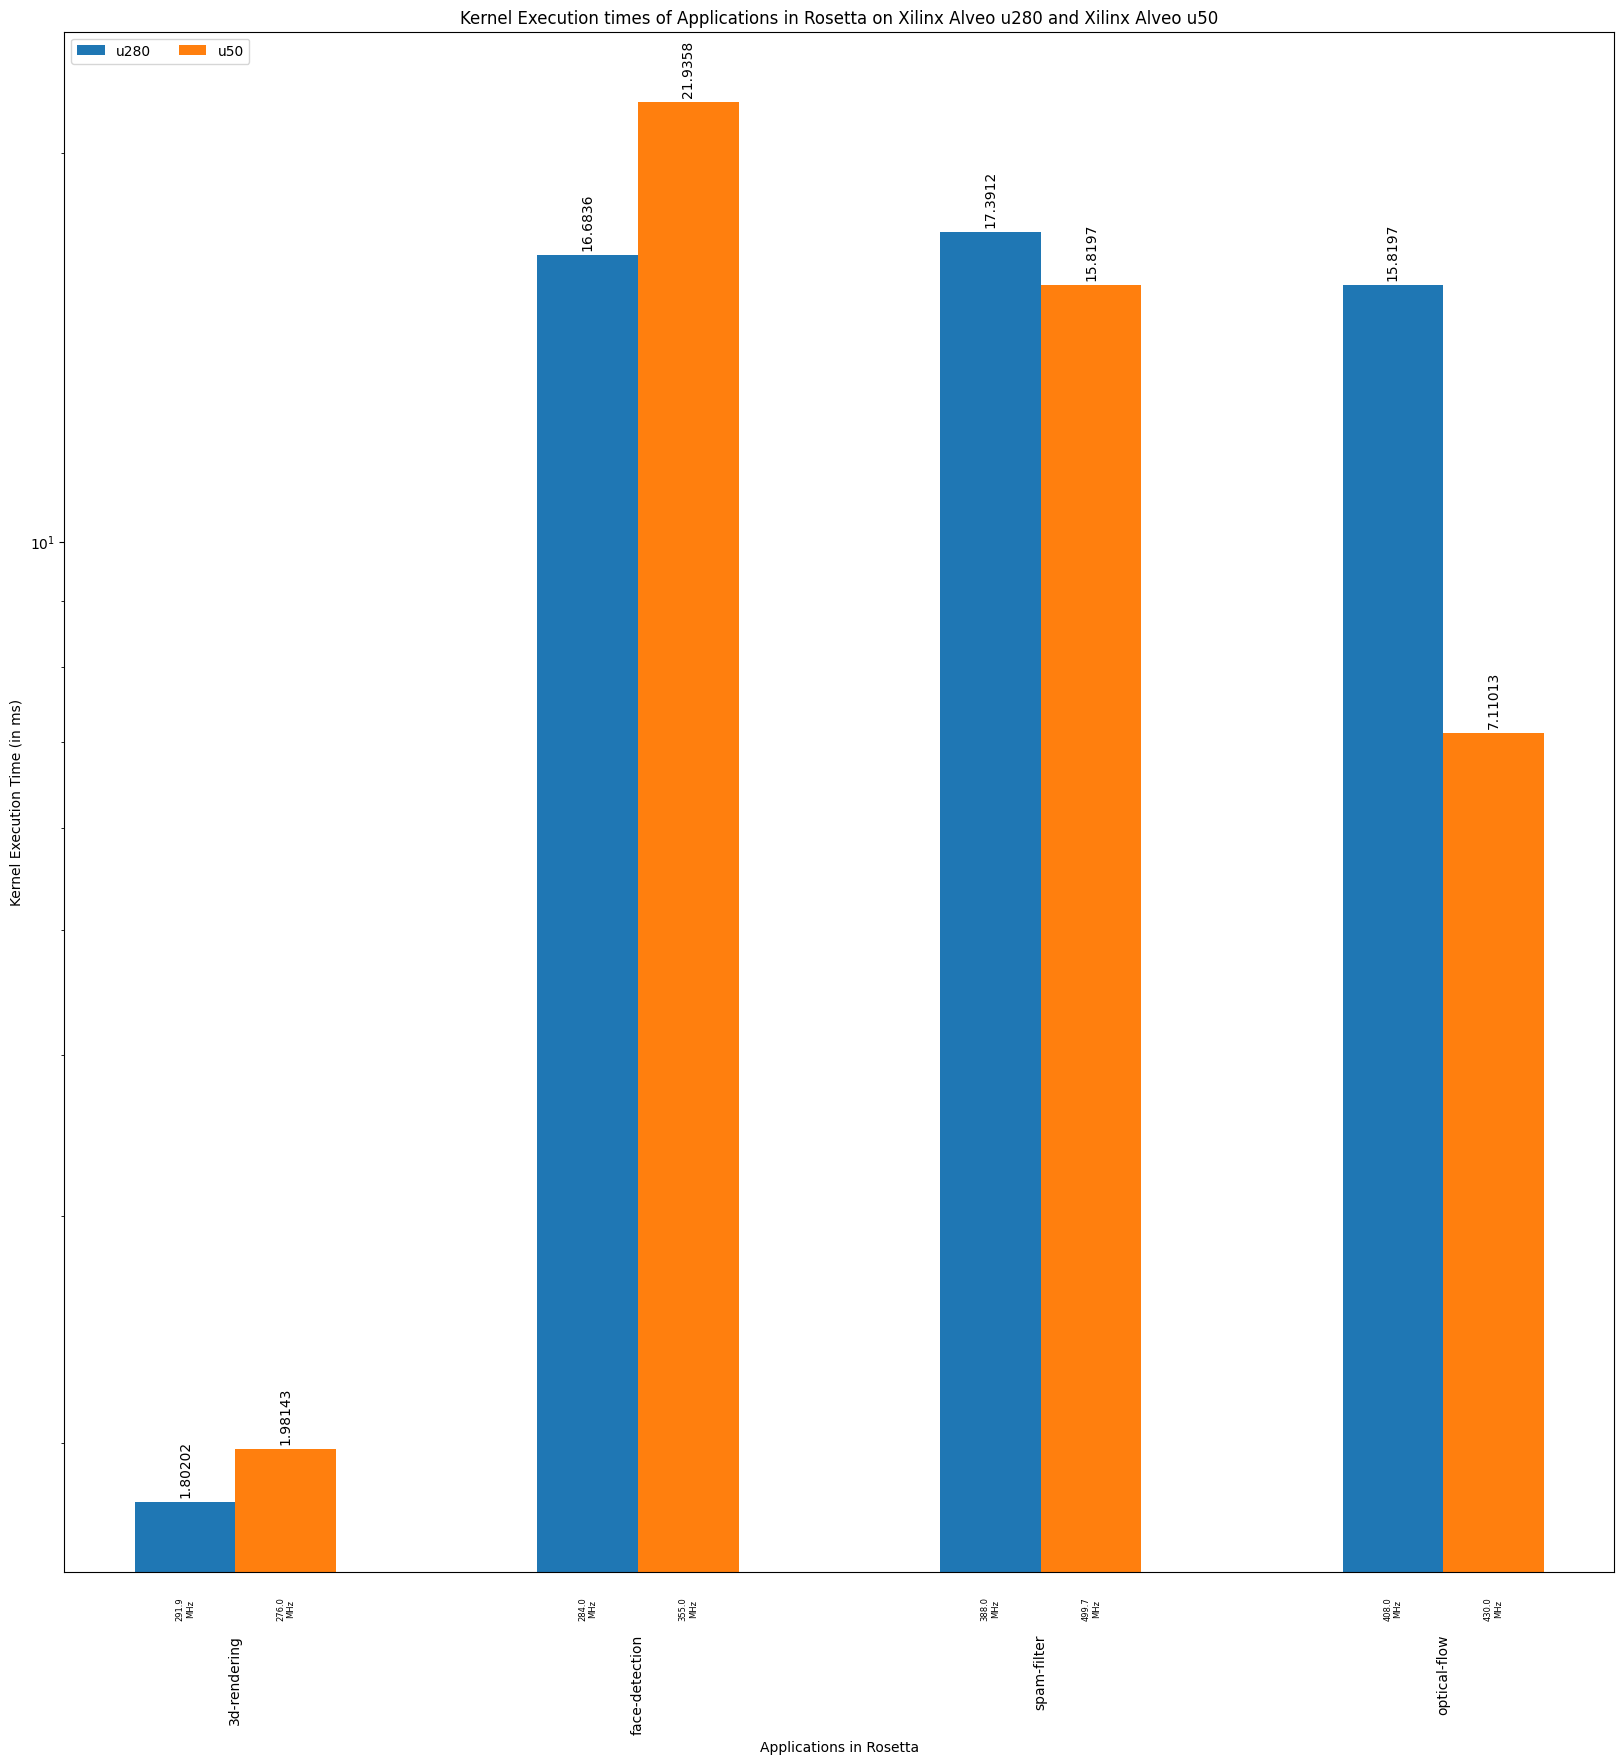

In [176]:
# To make the plot look good.

apps = rosetta_eval_df["Application"].unique()
x = np.arange(len(apps))
x2 = np.arange(len(rosetta_eval_df["Application"]))
print(x2)
width = 0.25
multiplier = 0

freq_ticks = []
for target in rosetta_eval_df["Target Device"].unique():
    freq_ticks.extend([str(a) + "\nMHz" for a in rosetta_eval_df[rosetta_eval_df["Target Device"] == target]["Actual Clock Frequency"].values])

print(freq_ticks)

fig, ax = plt.subplots(figsize=(20,20)) # (layout="constrained")

freq_ticks_offset = []
for target, execution_times in execution_times_per_target.items():
    offset = width * multiplier
    rects = ax.bar(
        x + offset,
        execution_times,
        width,
        label=target,
    )
    ax.bar_label(rects, padding=3, rotation=90, fontsize=10)
    freq_ticks_offset.extend([a for a in x + offset])
    multiplier += 1

ax.set_yscale("log")

ax.legend(loc="upper left", ncols=2)
ax.set_ylabel("Kernel Execution Time (in ms)")
ax.set_title("Kernel Execution times of Applications in Rosetta on Xilinx Alveo u280 and Xilinx Alveo u50")
ax.set_xticks(x + width / 2, apps, rotation=90)
ax.tick_params(axis='x', which='major', length=0, pad=45)
ax.set_xticks(freq_ticks_offset, freq_ticks, minor=True)
ax.tick_params(axis='x', which='minor', length=0, pad=18, labelsize=6, rotation=90)
ax.set_xlabel("Applications in Rosetta")

# Research Question 2: TODO ADD HERE

In [173]:
FCFS_FA_best_case = {
    3: np.sum([3.91, 5.37, 4.40]), # dataflow_stream_array, dataflow_stream, face-detection 
    5: np.sum([3.96, 16.93, 4.19, 4.18, 4.36]) # burst_rw, spam-filter, loop_reorder, systolic_array, kernel_chain
    # 7: np.sum(4.40, 6.92, )
    # 10: np.sum(4.40, 6.92, )
}

FCFS_RO_worst_case = {
    3: np.sum([5.61, 3.99, 5.81]), # dataflow_stream_array, dataflow_stream, face-detection 
    5: np.sum([5.53, 15.59, 5.63, 5.80, 5.68]) # burst_rw, spam-filter, loop_reorder, systolic_array, kernel_chain
    # 7: np.sum(4.40, 6.92, )
    # 10: np.sum(4.40, 6.92, )
}

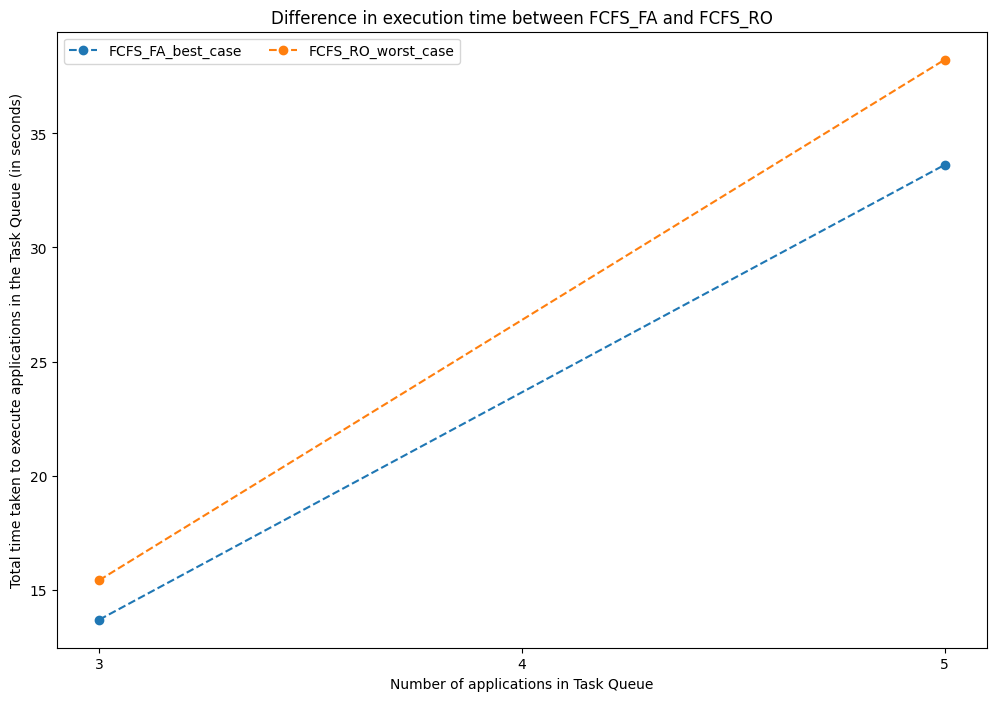

In [158]:
fig, ax = plt.subplots(figsize=(12,8)) # (layout="constrained")

ax.plot(FCFS_FA_best_case.keys(), FCFS_FA_best_case.values(), label='FCFS_FA_best_case', linestyle="--", marker="o")
ax.plot(FCFS_RO_worst_case.keys(), FCFS_RO_worst_case.values(), label='FCFS_RO_worst_case', linestyle="--", marker="o")


ax.legend(loc="upper left", ncols=2)
ax.set_ylabel("Total time taken to execute applications in the Task Queue (in seconds)")
ax.set_title("Difference in execution time between FCFS_FA and FCFS_RO")
ax.set_xlabel("Number of applications in Task Queue")

ax.xaxis.set_major_locator(MaxNLocator(integer=True))